$$\theta'' + \lambda \sin{\theta} + \mu cos{\theta} = 0$$
$$\theta_0' = \theta_1$$
$$\theta_1' = - \lambda \sin{\theta_0} -\mu \cos{\theta_0}

$$y = 
\begin{pmatrix}
  \theta_0(s) = \theta(s) \\
  \theta_1(s) = \theta'(s) \\
  y(s) \\
  x(s) \\
\end{pmatrix}$$

In [2]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

(a) Pinned-pinned without contact:

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          2.63e-05       9.38e-22          50              0       
Solved in 1 iterations, number of nodes 50. 
Maximum relative residual: 2.63e-05 
Maximum boundary residual: 9.38e-22


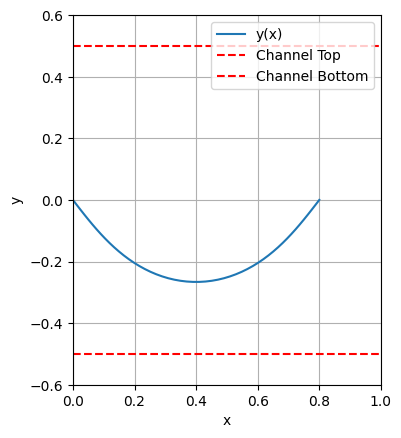

In [31]:
# System of ODEs: y = [theta0, theta1, y, x]
def fun(s, y, p):
    lamb, mu = p
    theta0 = y[0]
    theta1 = y[1]
    ys = y[2]
    xs = y[3]
    return np.vstack([
        theta1,
        -lamb * np.sin(theta0) - mu * np.cos(theta0),
        np.sin(theta0),
        np.cos(theta0)
    ])

# Boundary conditions
def bc(ya, yb, p):
    lamb, mu = p
    return np.array([
        #ya[0],        # θ(s_a)
        #yb[0],        # θ(s_b)       
        ya[1],        # θ'(s_a)     
        yb[1],        # θ'(s_b)       
        ya[2],        # y(s_a)
        yb[2],        # y(s_b)
        ya[3],        # x(s_a) 
        yb[3] - 0.8,  # x(s_b)    
    ])

s = np.linspace(0, 1, 50)

# Initial guess for solution y(s)
y_guess = np.zeros((4, s.size))
y_guess[0] = np.linspace(0, np.pi / 2, s.size)  # initial guess for theta0
y_guess[2] = np.linspace(0, 0.5, s.size)        # y(s) linear guess
y_guess[3] = np.linspace(0, 0.8, s.size)

# Initial guess for parameters [lambda, mu]
p_guess = np.array([1.0, 0.0])

# Solve the BVP
res = solve_bvp(fun, bc, s, y_guess, p=p_guess, max_nodes=1000000, verbose=2)

sol = res.sol(s)
y_pos = sol[2]
x_pos = sol[3]

plt.figure()
plt.plot(x_pos, y_pos, label='y(x)')
plt.axhline(0.5, color='red', linestyle='--', label='Channel Top')
plt.axhline(-0.5, color='red', linestyle='--', label='Channel Bottom')
plt.xlim(0, 1)
plt.ylim(-0.6, 0.6)
plt.gca().set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

(b) Clamped-pinned without contact:

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.32e-04       3.60e-21          50              0       
Solved in 1 iterations, number of nodes 50. 
Maximum relative residual: 1.32e-04 
Maximum boundary residual: 3.60e-21


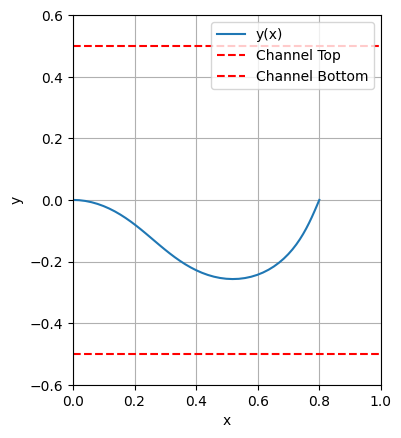

In [32]:
# System of ODEs: y = [theta0, theta1, y, x]
def fun(s, y, p):
    lamb, mu = p
    theta0 = y[0]
    theta1 = y[1]
    ys = y[2]
    xs = y[3]
    return np.vstack([
        theta1,
        -lamb * np.sin(theta0) - mu * np.cos(theta0),
        np.sin(theta0),
        np.cos(theta0)
    ])

# Boundary conditions
def bc(ya, yb, p):
    lamb, mu = p
    return np.array([
        ya[0],        # θ(s_a)
        #yb[0],        # θ(s_b)       
        #ya[1],        # θ'(s_a)     
        yb[1],        # θ'(s_b)       
        ya[2],        # y(s_a)
        yb[2],        # y(s_b)
        ya[3],        # x(s_a) 
        yb[3] - 0.8,  # x(s_b)    
    ])

s = np.linspace(0, 1, 50)

# Initial guess for solution y(s)
y_guess = np.zeros((4, s.size))
y_guess[0] = np.linspace(0, np.pi / 2, s.size)  # initial guess for theta0
y_guess[2] = np.linspace(0, 0.5, s.size)        # y(s) linear guess
y_guess[3] = np.linspace(0, 0.8, s.size)

# Initial guess for parameters [lambda, mu]
p_guess = np.array([1.0, 0.0])

# Solve the BVP
res = solve_bvp(fun, bc, s, y_guess, p=p_guess, max_nodes=1000000, verbose=2)

sol = res.sol(s)
y_pos = sol[2]
x_pos = sol[3]

plt.figure()
plt.plot(x_pos, y_pos, label='y(x)')
plt.axhline(0.5, color='red', linestyle='--', label='Channel Top')
plt.axhline(-0.5, color='red', linestyle='--', label='Channel Bottom')
plt.xlim(0, 1)
plt.ylim(-0.6, 0.6)
plt.gca().set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

(c) Pinned-contact:

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          5.01e+00       5.55e-17          50             95       
       2          9.66e-01       1.06e-17          145            186      
       3          1.35e+00       1.11e-16          331            457      
       4          1.29e+00       1.11e-16          788           1117      
       5          1.52e+00       5.55e-17         1905           2908      
       6          9.89e-01       7.46e-18         4813           7670      
       7          7.02e+00       1.11e-16         12483          24300     
       8          1.00e+00       3.16e-18         36783          64666     
       9          1.24e+00       9.71e-18        101449         179793     
      10          1.46e+00       2.39e-17        281242         532330     
      11          1.32e+00       1.11e-16        813572        (1512923)   
Number of nodes is exceeded after iteration 11. 
Maximum relative residual: 1.32e+00 
Ma

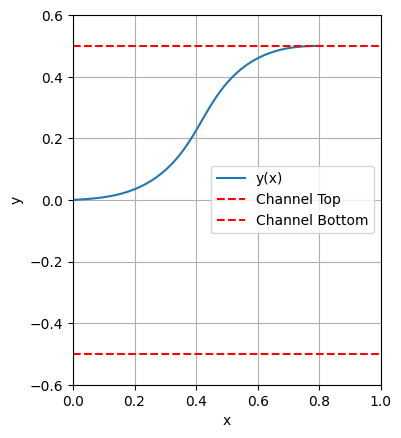

In [35]:
# System of ODEs: y = [theta0, theta1, y, x]
def fun(s, y, p):
    lamb, mu = p
    theta0 = y[0]
    theta1 = y[1]
    ys = y[2]
    xs = y[3]
    return np.vstack([
        theta1,
        -lamb * np.sin(theta0) - mu * np.cos(theta0),
        np.sin(theta0),
        np.cos(theta0)
    ])

# Boundary conditions
def bc(ya, yb, p):
    lamb, mu = p
    return np.array([
        #ya[0],        # θ(s_a)
        yb[0],        # θ(s_b)       
        ya[1],        # θ'(s_a)     
        #yb[1],        # θ'(s_b)       
        ya[2],        # y(s_a)
        yb[2] - 0.5,        # y(s_b)
        ya[3],        # x(s_a) 
        yb[3] - 0.8,  # x(s_b)    
    ])

s = np.linspace(0, 1, 50)

# Initial guess for solution y(s)
y_guess = np.zeros((4, s.size))
y_guess[0] = np.linspace(0, np.pi / 2, s.size)  # initial guess for theta0
y_guess[2] = np.linspace(0, 0.5, s.size)        # y(s) linear guess
y_guess[3] = np.linspace(0, 0.8, s.size)

# Initial guess for parameters [lambda, mu]
p_guess = np.array([1.0, 0.0])

# Solve the BVP
res = solve_bvp(fun, bc, s, y_guess, p=p_guess, max_nodes=1000000, verbose=2)

sol = res.sol(s)
y_pos = sol[2]
x_pos = sol[3]

plt.figure()
plt.plot(x_pos, y_pos, label='y(x)')
plt.axhline(0.5, color='red', linestyle='--', label='Channel Top')
plt.axhline(-0.5, color='red', linestyle='--', label='Channel Bottom')
plt.xlim(0, 1)
plt.ylim(-0.6, 0.6)
plt.gca().set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

(d) Clamped-contact:

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          4.51e-02       8.50e-19          50             39       
       2          2.50e-05       6.35e-22          89              0       
Solved in 2 iterations, number of nodes 89. 
Maximum relative residual: 2.50e-05 
Maximum boundary residual: 6.35e-22


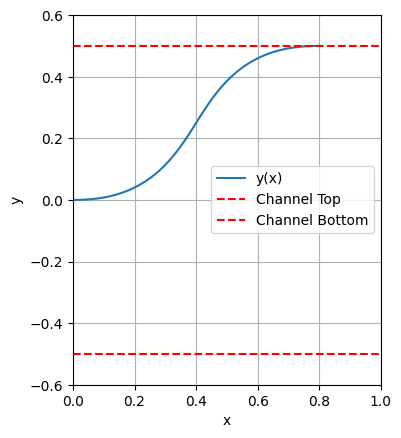

In [30]:
# System of ODEs: y = [theta0, theta1, y, x]
def fun(s, y, p):
    lamb, mu = p
    theta0 = y[0]
    theta1 = y[1]
    ys = y[2]
    xs = y[3]
    return np.vstack([
        theta1,
        -lamb * np.sin(theta0) - mu * np.cos(theta0),
        np.sin(theta0),
        np.cos(theta0)
    ])

# Boundary conditions
def bc(ya, yb, p):
    lamb, mu = p
    return np.array([
        ya[0],        # θ(s_a)
        yb[0],        # θ(s_b)       
        #ya[1],        # θ'(s_a)     
        #yb[1],        # θ'(s_b)       
        ya[2],        # y(s_a)
        yb[2] - 0.5,        # y(s_b)
        ya[3],        # x(s_a) 
        yb[3] - 0.8,  # x(s_b)    
    ])

s = np.linspace(0, 1, 50)

# Initial guess for solution y(s)
y_guess = np.zeros((4, s.size))
y_guess[0] = np.linspace(0, np.pi / 2, s.size)  # initial guess for theta0
y_guess[2] = np.linspace(0, 0.5, s.size)        # y(s) linear guess
y_guess[3] = np.linspace(0, 0.8, s.size)

# Initial guess for parameters [lambda, mu]
p_guess = np.array([1.0, 0.0])

# Solve the BVP
res = solve_bvp(fun, bc, s, y_guess, p=p_guess, max_nodes=1000000, verbose=2)

sol = res.sol(s)
y_pos = sol[2]
x_pos = sol[3]

plt.figure()
plt.plot(x_pos, y_pos, label='y(x)')
plt.axhline(0.5, color='red', linestyle='--', label='Channel Top')
plt.axhline(-0.5, color='red', linestyle='--', label='Channel Bottom')
plt.xlim(0, 1)
plt.ylim(-0.6, 0.6)
plt.gca().set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

(e) Contact-contact, same wall:

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          8.03e-02       1.87e-19          50             28       
       2          6.71e-05       2.05e-19          78              0       
Solved in 2 iterations, number of nodes 78. 
Maximum relative residual: 6.71e-05 
Maximum boundary residual: 2.05e-19


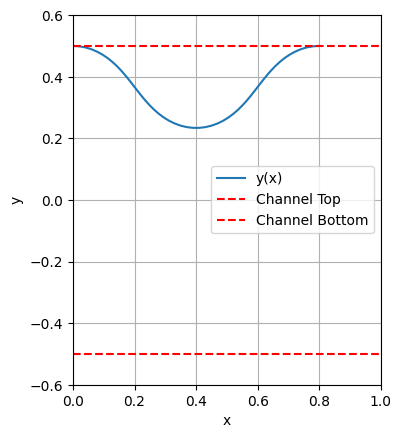

In [29]:
# System of ODEs: y = [theta0, theta1, y, x]
def fun(s, y, p):
    lamb, mu = p
    theta0 = y[0]
    theta1 = y[1]
    ys = y[2]
    xs = y[3]
    return np.vstack([
        theta1,
        -lamb * np.sin(theta0) - mu * np.cos(theta0),
        np.sin(theta0),
        np.cos(theta0)
    ])

# Boundary conditions
def bc(ya, yb, p):
    lamb, mu = p
    return np.array([
        ya[0],        # θ(s_a)
        yb[0],        # θ(s_b)       
        #ya[1],        # θ'(s_a)     
        #yb[1],        # θ'(s_b)       
        ya[2] - 0.5,        # y(s_a)
        yb[2] - 0.5,        # y(s_b)
        ya[3],        # x(s_a) 
        yb[3] - 0.8,  # x(s_b)    
    ])

s = np.linspace(0, 1, 50)

# Initial guess for solution y(s)
y_guess = np.zeros((4, s.size))
y_guess[0] = np.linspace(0, np.pi / 2, s.size)  # initial guess for theta0
y_guess[2] = np.linspace(0, 0.5, s.size)        # y(s) linear guess
y_guess[3] = np.linspace(0, 0.8, s.size)

# Initial guess for parameters [lambda, mu]
p_guess = np.array([1.0, 0.0])

# Solve the BVP
res = solve_bvp(fun, bc, s, y_guess, p=p_guess, max_nodes=1000000, verbose=2)

sol = res.sol(s)
y_pos = sol[2]
x_pos = sol[3]

plt.figure()
plt.plot(x_pos, y_pos, label='y(x)')
plt.axhline(0.5, color='red', linestyle='--', label='Channel Top')
plt.axhline(-0.5, color='red', linestyle='--', label='Channel Bottom')
plt.xlim(0, 1)
plt.ylim(-0.6, 0.6)
plt.gca().set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()